In [1]:
import pandas_datareader.data as web

In [2]:
import pandas as pd

In [3]:
import datetime as dt

In [4]:
df = web.DataReader('AAPL', 'yahoo', '2010-10-01', '2020-10-01')

In [5]:
dff = df.sort_values(by=["Date"], ascending=False)
dd=pd.DataFrame(dff)
dd.to_csv('file.csv', index=False)

In [6]:
import numpy as np

data = pd.read_csv('file.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

         High         Low        Open       Close       Volume   Adj Close
0  117.720001  115.830002  117.639999  116.790001  116120400.0  116.043625
1  117.260002  113.620003  113.790001  115.809998  142675200.0  115.069893
2  115.309998  113.570000  114.550003  114.089996   99382200.0  113.360878
3  115.320000  112.779999  115.010002  114.959999  137672400.0  114.225311
4  112.440002  107.669998  108.430000  112.279999  149981400.0  111.562439


Open   --- mean : 33.46332020170871   	 Std:  20.67419087039067   	 Max:  137.58999633789062   	 Min:  10.057143211364746
High   --- mean : 33.80326959451734   	 Std:  20.963901646250463   	 Max:  137.97999572753906   	 Min:  10.103570938110352
Low    --- mean : 33.12439872519087   	 Std:  20.372943253369055   	 Max:  130.52999877929688   	 Min:  9.92035675048828
Close  --- mean : 33.47849498868415   	 Std:  20.68978489617848   	 Max:  134.17999267578125   	 Min:  9.95142936706543
Volume --- mean : 263906591.10758236   	 Std:  203619825.77201

In [7]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)
print(stocks.head())
print(stocks.tail())

   Item       Open      Close       Volume
0     0  10.321429  10.133929  673391600.0
1     1  10.219643  10.090000  448142800.0
2     2  10.057143   9.951429  435302000.0
3     3  10.071429  10.319286  501967200.0
4     4  10.342500  10.328214  670868800.0
      Item        Open       Close       Volume
2514  2514  108.430000  112.279999  149981400.0
2515  2515  115.010002  114.959999  137672400.0
2516  2516  114.550003  114.089996   99382200.0
2517  2517  113.790001  115.809998  142675200.0
2518  2518  117.639999  116.790001  116120400.0


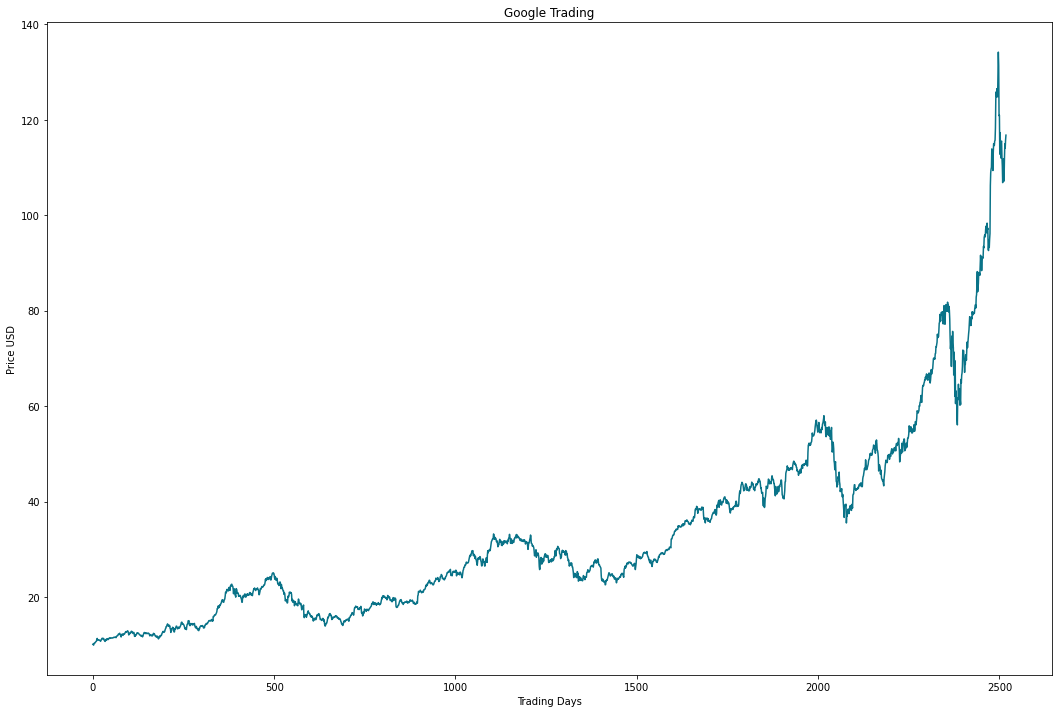

In [8]:
import visualize

visualize.plot_basic(stocks)

In [9]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.002072  0.001469  0.342101
1     1  0.001274  0.001115  0.219386
2     2  0.000000  0.000000  0.212391
3     3  0.000112  0.002961  0.248710
4     4  0.002238  0.003033  0.340727


Open   --- mean : 0.18353056813621663   	 Std:  0.16210874581375295   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.18938531522056223   	 Std:  0.16654611745579848   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.11901533115828081   	 Std:  0.11093123356597187   	 Max:  1.0   	 Min:  0.0


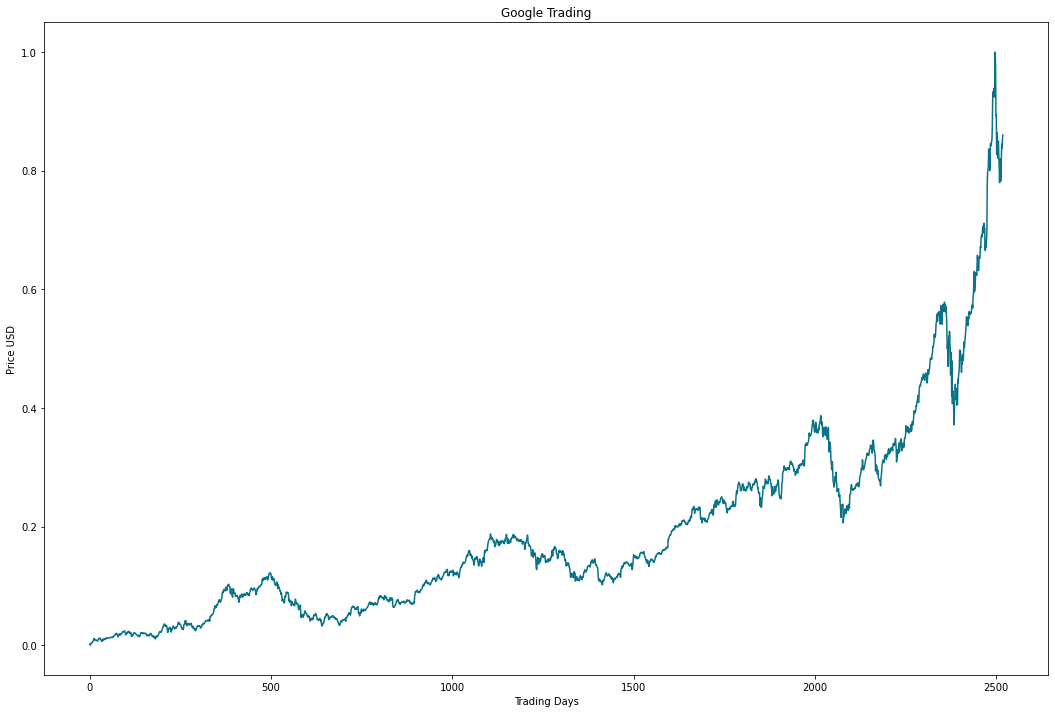

In [10]:
visualize.plot_basic(stocks)

In [11]:
stocks.to_csv('file_preprocessed.csv',index= False)

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('file_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.002072,0.001469,0.342101
1,1,0.001274,0.001115,0.219386
2,2,0.000000,0.000000,0.212391
3,3,0.000112,0.002961,0.248710
4,4,0.002238,0.003033,0.340727


In [13]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1726, 1)
y_train (1726, 1)
x_test (793, 1)
y_test (793, 1)


In [14]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [15]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

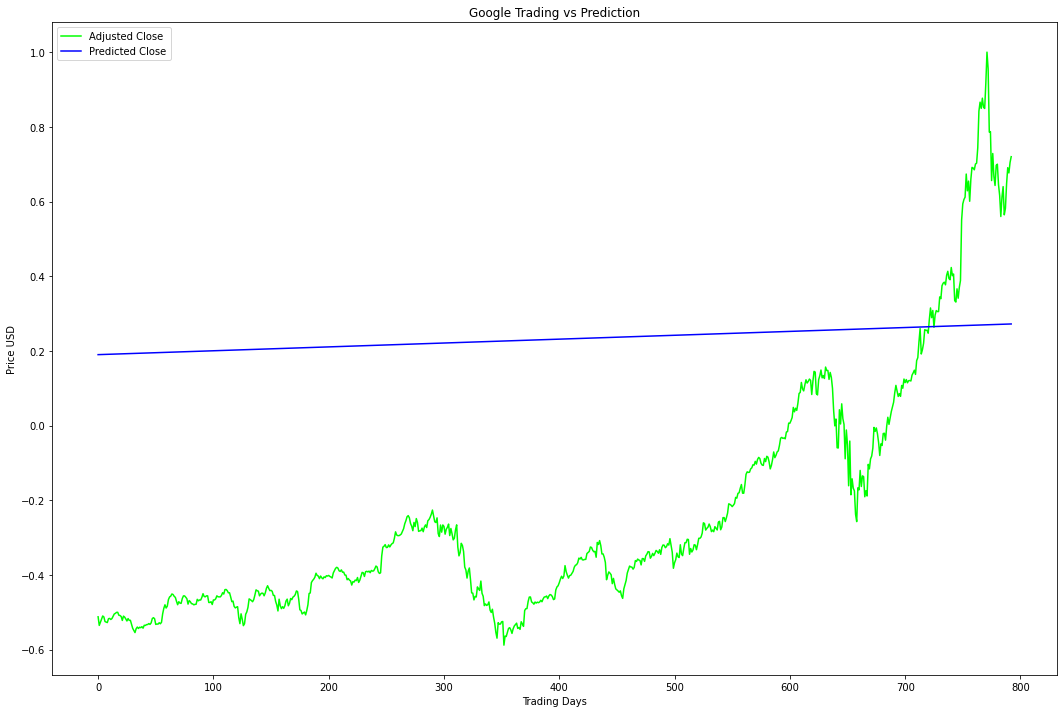

In [16]:
vs.plot_prediction(y_test,predictions)

In [17]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.3230 MSE (0.5683 RMSE)
Test Score: 0.30816525 MSE (0.55512633 RMSE)


In [18]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('file_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.002072,0.001469,0.342101
1,0.001274,0.001115,0.219386
2,0.000000,0.000000,0.212391
3,0.000112,0.002961,0.248710
4,0.002238,0.003033,0.340727


In [19]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1963, 50, 3)
y_train (1963,)
x_test (446, 50, 3)
y_test (446,)


In [20]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.020322084426879883


In [21]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

59/59 [==============================] - 9s 69ms/step - loss: 0.0012 - val_loss: 6.4106e-04


In [22]:
predictions = model.predict(X_test)

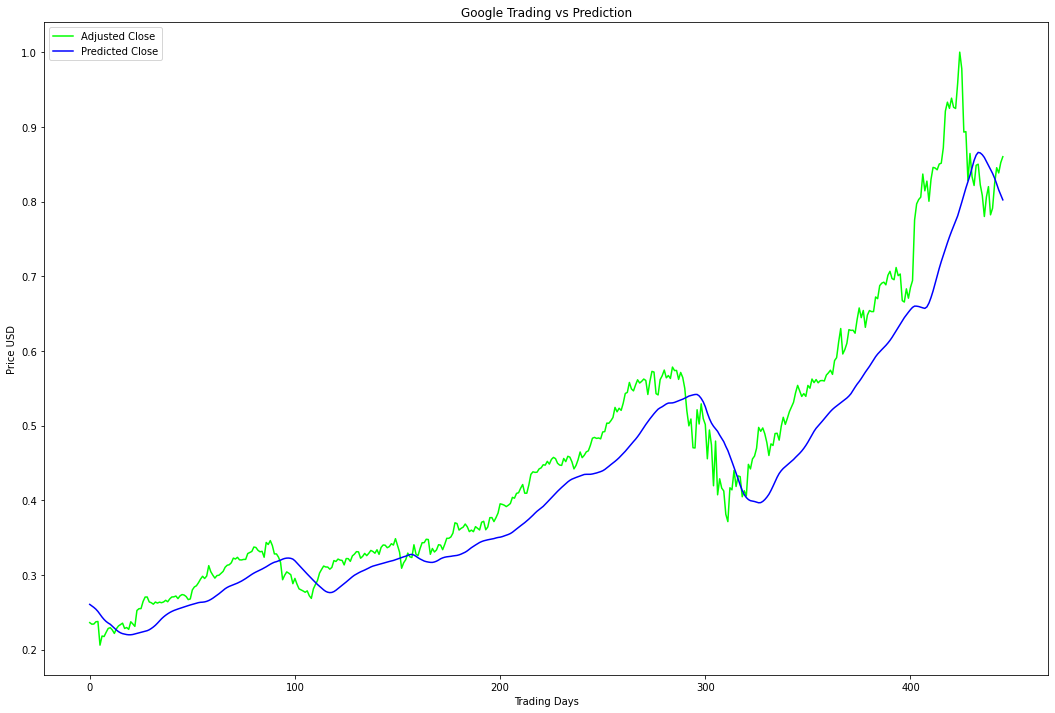

In [23]:
vs.plot_lstm_prediction(y_test,predictions)

In [24]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00014527 MSE (0.01205281 RMSE)
Test Score: 0.00331911 MSE (0.05761176 RMSE)


In [25]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.005000114440917969


In [26]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
19/19 - 9s - loss: 0.0022 - val_loss: 2.8448e-04
Epoch 2/5
19/19 - 2s - loss: 3.4101e-04 - val_loss: 6.8939e-04
Epoch 3/5
19/19 - 2s - loss: 2.3615e-04 - val_loss: 6.1610e-04
Epoch 4/5
19/19 - 2s - loss: 1.8378e-04 - val_loss: 2.7383e-04
Epoch 5/5
19/19 - 2s - loss: 2.0946e-04 - val_loss: 4.2336e-04


In [27]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

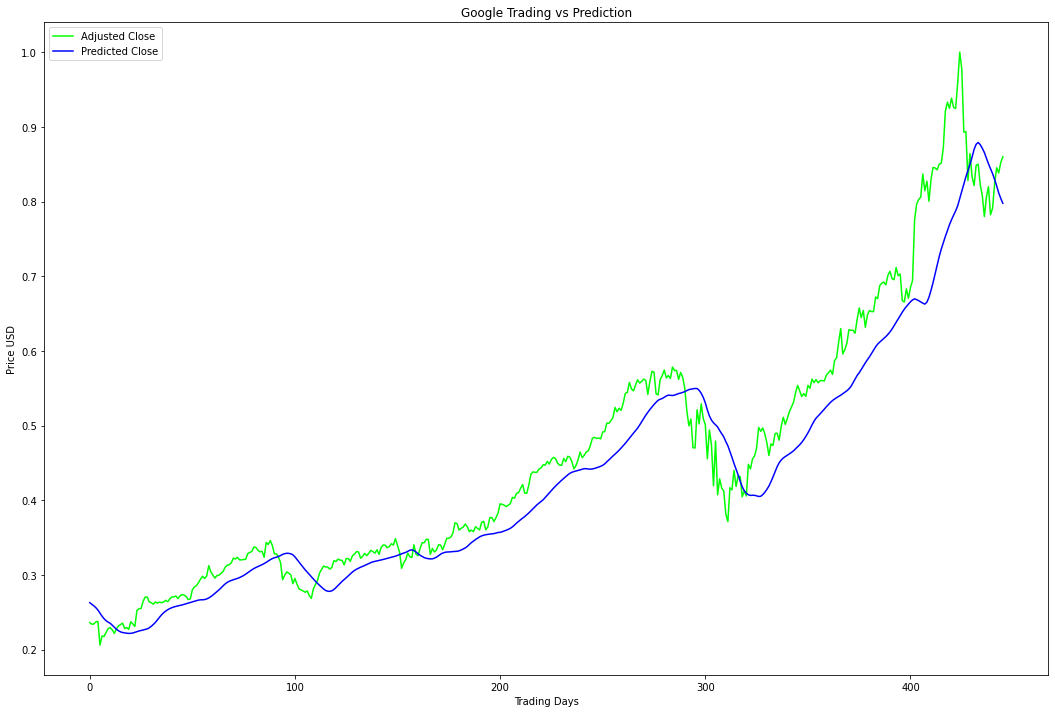

In [28]:
vs.plot_lstm_prediction(y_test,predictions)

In [29]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00011507 MSE (0.01072695 RMSE)
Test Score: 0.00267055 MSE (0.05167733 RMSE)


In [30]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.002671 - RMSE * Adjusted Close Range


In [31]:
import preprocess_data as ppd

data = pd.read_csv('file.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.002072  0.001469  0.342101
1  0.001274  0.001115  0.219386
2  0.000000  0.000000  0.212391
3  0.000112  0.002961  0.248710
4  0.002238  0.003033  0.340727
(2518, 1, 3)
(2518,)
Test Score: 0.0514 MSE (0.2268 RMSE)
